In [ ]:
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath('../'))

DATA_PATH = Path('../data/processed/dataset_cleaned.csv')

print(f"Data Source: {DATA_PATH}")

plt.style.use('seaborn-v0_8-whitegrid')

sns.set_palette('husl')pd.set_option('display.precision', 2)

plt.rcParams['figure.dpi'] = 100pd.set_option('display.max_columns', None)

plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 10plt.rcParams['axes.titlesize'] = 12

Using processed dataset: ..\data\processed\esg_data_cleaned.csv


In [ ]:
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Dataset not found: {DATA_PATH}. Run 01_data_cleaning.ipynb first.")

df = pd.read_csv(DATA_PATH)
df.columns = df.columns.str.strip()

print(f"Dataset Loaded: {df.shape[0]:,} records")

print(f"\nSector Distribution:")df.head(10)

print(df['Sector'].value_counts())

(503, 15)


,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",21.05,4.05,6.1,8.9,NaN,2.0,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.30,12.80,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.20,10.60,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",21.05,4.05,6.1,8.9,NaN,2.0,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.60,0.10,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


C:\Users\surya\AppData\Local\Temp\ipykernel_288\1534643851.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sector_avg.index, y=sector_avg.values, palette='viridis')


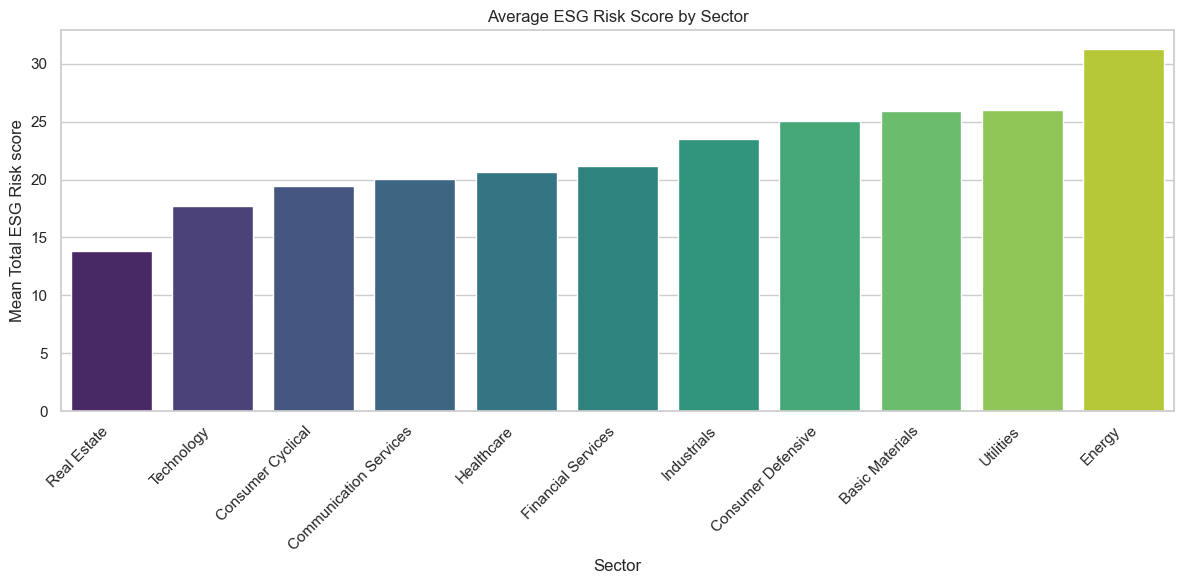

In [ ]:
metric = 'Total ESG Risk score'

if metric not in df.columns:
    raise KeyError(f"Column '{metric}' not found")
if 'Sector' not in df.columns:
    raise KeyError("Column 'Sector' not found")

sector_stats = df.groupby('Sector')[metric].agg(['mean', 'median', 'std', 'count']).sort_values('mean')

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

ax1 = axes[0]
y_pos = np.arange(len(sector_stats))

ax1.barh(y_pos, sector_stats['mean'], color='skyblue', edgecolor='black', alpha=0.8)print(sector_stats)

ax1.errorbar(sector_stats['mean'], y_pos, xerr=sector_stats['std'], print("=" * 80)

             fmt='none', ecolor='red', capsize=5, alpha=0.7)print("\nSector Statistics")

ax1.set_yticks(y_pos)

ax1.set_yticklabels(sector_stats.index)plt.show()

ax1.set_xlabel('Mean ESG Risk Score')plt.tight_layout()

ax1.set_title('Average ESG Risk Score by Sector (with Std Dev)')

ax1.grid(axis='x', alpha=0.3)plt.suptitle('')

for i, (idx, row) in enumerate(sector_stats.iterrows()):plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

    ax1.text(row['mean'] + 1, i, f"{row['mean']:.1f}", va='center')ax2.set_title('ESG Risk Score Distribution by Sector')

ax2.set_ylabel('ESG Risk Score')

ax2 = axes[1]ax2.set_xlabel('Sector')

df.boxplot(column=metric, by='Sector', ax=ax2, grid=False, patch_artist=True,           medianprops=dict(color='red', linewidth=2))
           boxprops=dict(facecolor='lightgreen', alpha=0.7),

In [ ]:
metric = 'Total ESG Risk score'

if metric not in df.columns or 'Name' not in df.columns or 'Sector' not in df.columns:
    raise KeyError("Required columns missing")

ranked = df.sort_values(metric)

print("Top 10 Companies (Lowest ESG Risk)")
print("=" * 80)

top_10 = ranked[['Name', 'Sector', metric]].head(10).reset_index(drop=True)plt.show()

top_10.index += 1plt.tight_layout()

print(top_10.to_string())

axes[1].grid(axis='x', alpha=0.3)

print("\n" + "=" * 80)axes[1].invert_yaxis()

print("Bottom 10 Companies (Highest ESG Risk)")axes[1].set_title('Bottom 10 Worst Performers')

print("=" * 80)axes[1].set_xlabel('ESG Risk Score')

bottom_10 = ranked[['Name', 'Sector', metric]].tail(10).reset_index(drop=True)axes[1].set_yticklabels(bottom_10['Name'])

bottom_10.index += 1axes[1].set_yticks(range(10))

print(bottom_10.to_string())axes[1].barh(range(10), bottom_10[metric], color='red', alpha=0.7, edgecolor='black')



fig, axes = plt.subplots(1, 2, figsize=(16, 6))axes[0].grid(axis='x', alpha=0.3)

axes[0].invert_yaxis()

axes[0].barh(range(10), top_10[metric], color='green', alpha=0.7, edgecolor='black')axes[0].set_title('Top 10 Best Performers')

axes[0].set_yticks(range(10))axes[0].set_xlabel('ESG Risk Score')
axes[0].set_yticklabels(top_10['Name'])

Lowest risk (top 10):
                                         Name                  Sector  \
288                              Hasbro, Inc.       Consumer Cyclical   
240               Keysight Technologies, Inc.              Technology   
409                          Cbre Group, Inc.             Real Estate   
408                           Cdw Corporation              Technology   
498                             Accenture Plc              Technology   
451               Avalonbay Communities, Inc.             Real Estate   
371                         Crown Castle Inc.             Real Estate   
137                            Prologis, Inc.             Real Estate   
69   The Interpublic Group of Companies, Inc.  Communication Services   
107          Seagate Technology Holdings Plcs              Technology   

     Total ESG Risk score  
288                   7.1  
240                   7.6  
409                   8.0  
408                   9.2  
498                   9.8  
451   

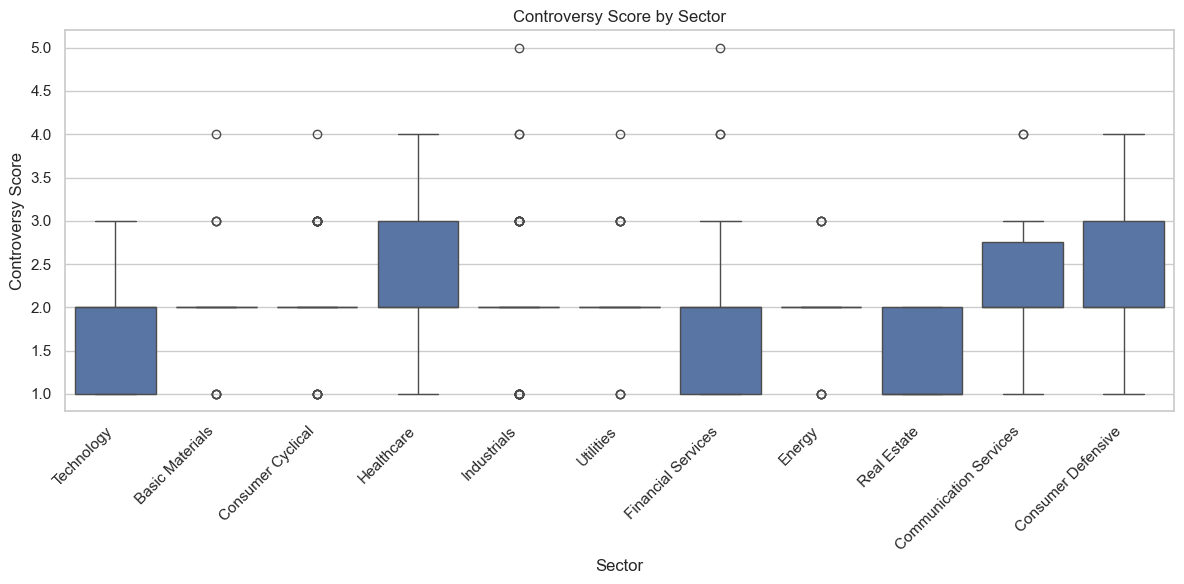

In [ ]:
if 'Controversy Score' not in df.columns or 'Sector' not in df.columns:
    raise KeyError("Required columns missing")

controversy_stats = df.groupby('Sector')['Controversy Score'].agg(['mean', 'median', 'max', 'count']).sort_values('mean', ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

ax1 = axes[0]
sns.boxplot(data=df, x='Sector', y='Controversy Score', ax=ax1, palette='Reds')

ax1.set_xlabel('Sector')print(controversy_stats)

ax1.set_ylabel('Controversy Score')print("=" * 80)

ax1.set_title('Controversy Score Distribution by Sector')print("\nControversy Statistics by Sector")

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.grid(axis='y', alpha=0.3)plt.show()

plt.tight_layout()

ax2 = axes[1]

y_pos = np.arange(len(controversy_stats))    ax2.text(row['mean'] + 0.5, i, f"{row['mean']:.1f}", va='center')

ax2.barh(y_pos, controversy_stats['mean'], color='coral', edgecolor='black', alpha=0.8)for i, (idx, row) in enumerate(controversy_stats.iterrows()):

ax2.set_yticks(y_pos)ax2.grid(axis='x', alpha=0.3)

ax2.set_yticklabels(controversy_stats.index)ax2.set_title('Average Controversy Score by Sector')
ax2.set_xlabel('Mean Controversy Score')